##### сеть не удаляет(не блокирует) узел если он перегружен, просто уменьшается нагрузка
##### узел считается свободным если очередь < L*0,5
MultiplierThresholdToBlock 50, FractionThresholdToUnBlock 0,5, UseOnlyIsActiveNodes True, NumberOfGenerations 120 <br>
<strong>Поток Quantity 100 </strong>

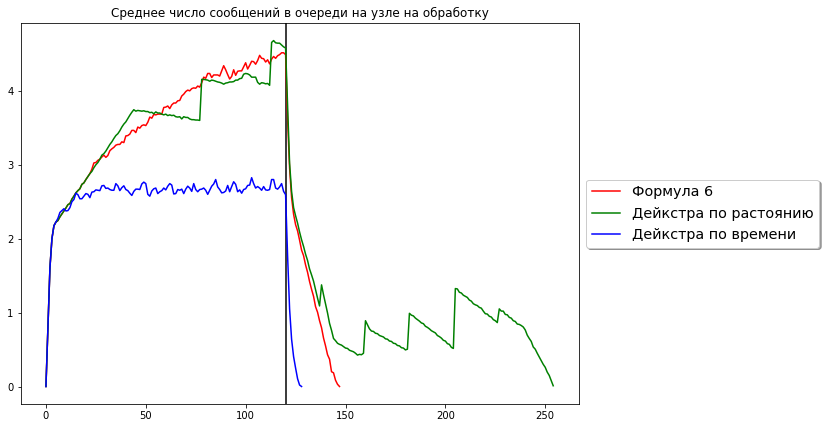

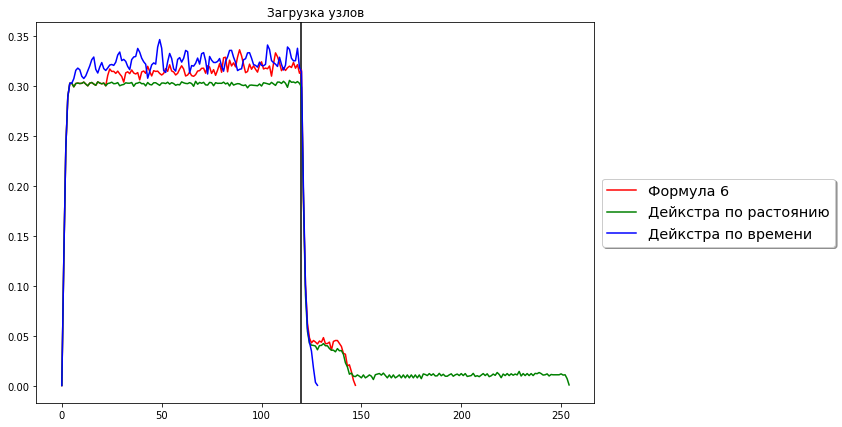

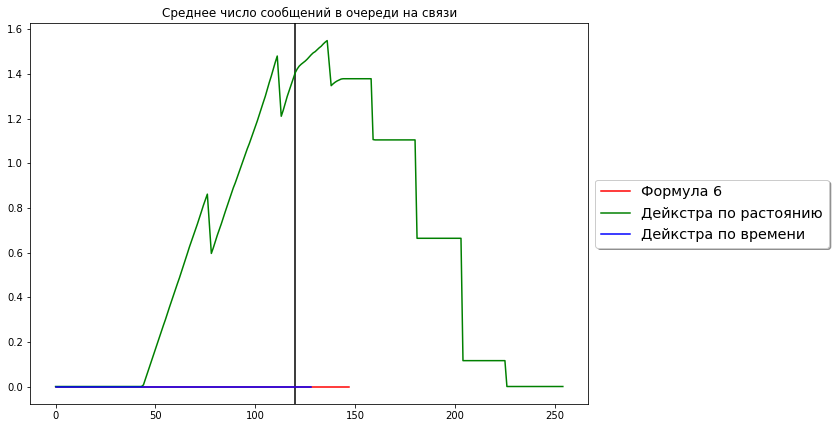

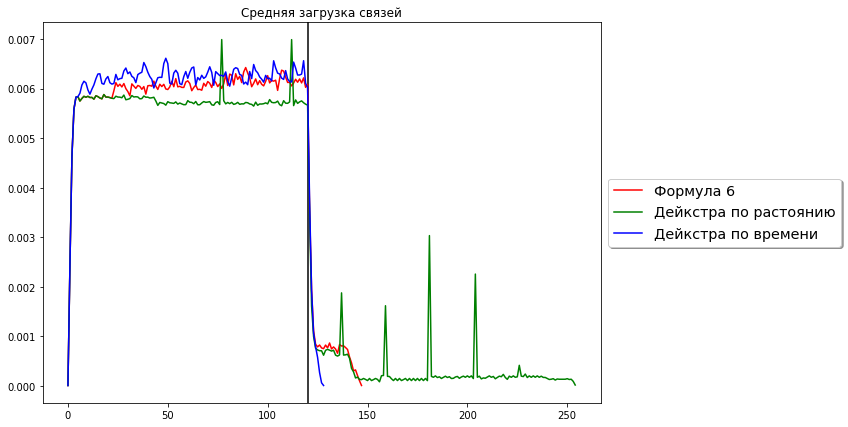

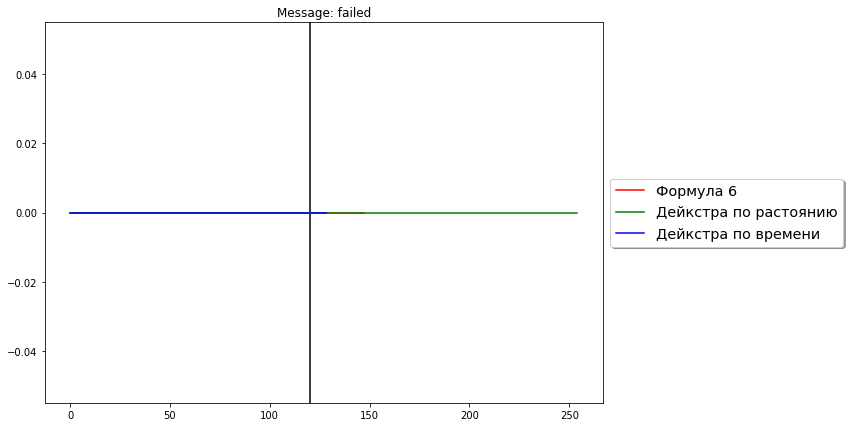

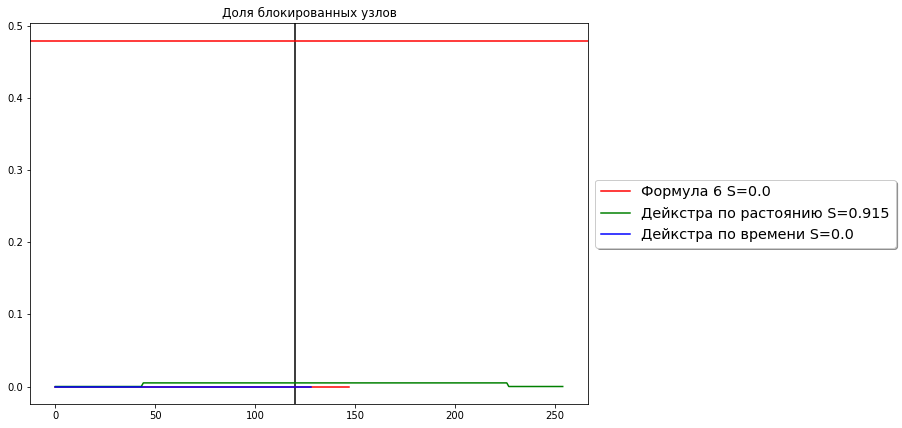

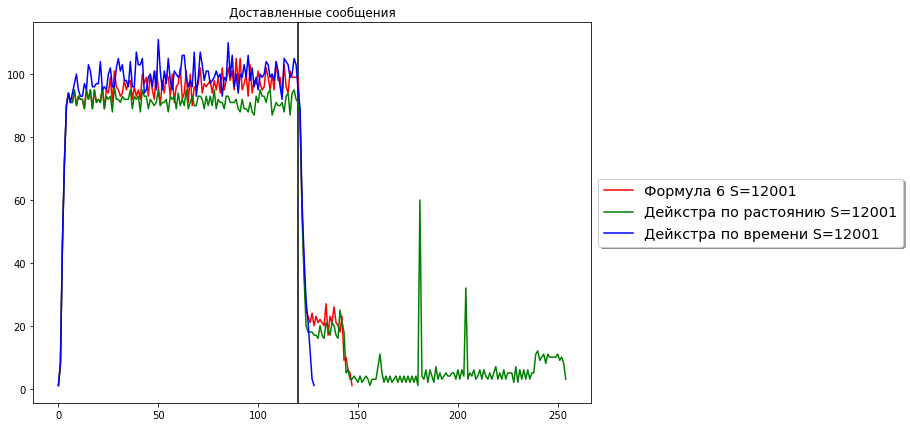

In [5]:
from matplotlib import pyplot as plt
import numpy as np
from datetime import datetime
import pandas as pd
import os
  
log_dir_path = os.path.abspath('..\\')+"\\Result"

log_tags = [
 {"tag":  "f09eca0d-a64e-4247-8287-3de1f6e7613a", "label": "Формула 6", "color": "red"},
 {"tag":  "72afdcba-3879-4e09-a55e-5255fe5c97b7", "label": "Дейкстра по растоянию", "color": "green"},
 {"tag":  "8dea6bd0-bf81-4e72-9b4c-69b0c8f261b2", "label": "Дейкстра по времени", "color": "blue"},
 
]

files = [
    {"filename": "Netsim-Node-Metrics-queue-{log_tag}", "title": "Среднее число сообщений в очереди на узле на обработку" },
    {"filename": "Netsim-Node-Metrics-load-{log_tag}", "title": "Загрузка узлов" },
    {"filename": "Netsim-Connection-Metrics-queue-{log_tag}", "title": "Среднее число сообщений в очереди на связи"},
    {"filename": "Netsim-Connection-Metrics-load-{log_tag}", "title": "Средняя загрузка связей"},
    {"filename": "Netsim-Message-Metrics-failed-{log_tag}", "title": "Message: failed"},
]

filesBlocked = [
    {"filename": "Netsim-Node-Metrics-blocked-{log_tag}", "title": "Доля блокированных узлов" },
]

filesMessage = [
    {"filename": "Netsim-Message-Metrics-{log_tag}", "title": "Доставленные сообщения" },

]
          
def load_csv_file(path):
    file = open(path)
    data = file.readlines()
    splitted_data = [x.split(',') for x in data]
    return splitted_data, len(splitted_data[0])


def aggeregate_line(array):
    aggregated = [sum([float(y) for y in x])/len(x) for x in array]
    return aggregated, len(aggregated)


def plot(x, y, x2, y2, title):
    fig, ax = plt.subplots()
    ax.plot(x, y, label=title, c="blue")
    ax.plot(x2, y2, label=title, c="red")
    ax.set_title(title)
    plt.axvline(x=500, c="green")

def showStat():
    for file in files:
        fig, ax = plt.subplots()
        plt.rcParams['figure.figsize'] = [10, 7]
        ax.set_title(file['title'])
        plt.axvline(x=120, c="black")
       
        for log_tag in log_tags:
            data, line_len = load_csv_file(f"{log_dir_path}/{file['filename'].format(log_tag = log_tag['tag'])}")
            aggregated, count = aggeregate_line(data)
            ax.plot(range(0, count), aggregated, c=log_tag['color'], label=log_tag['label'])    
            legend = ax.legend(loc='center left', bbox_to_anchor=(1, 0.5), shadow=True, fontsize='x-large')
            legend.get_frame()
                                   
    plt.show()
                                           
def aggeregate_line_perc_node(array):
    aggregated = [sum([1 for y in x if float(y) > 0])/len(x) for x in array]
    return aggregated, len(aggregated)

def showStatBlocked():
    for file in filesBlocked:
        fig, ax = plt.subplots()
        plt.rcParams['figure.figsize'] = [10, 7]
        ax.set_title(file['title'])
        plt.axvline(x=120, c="black")
        plt.axhline(y=0.48, color='r', linestyle='-')
       
        for log_tag in log_tags:
            data, line_len = load_csv_file(f"{log_dir_path}/{file['filename'].format(log_tag = log_tag['tag'])}")
            aggregated, count = aggeregate_line_perc_node(data)
            summ = np.sum(aggregated)
            ax.plot(range(0, count), aggregated, c=log_tag['color'], label=log_tag['label']+' S='+str(summ))    
            legend = ax.legend(loc='center left', bbox_to_anchor=(1, 0.5), shadow=True, fontsize='x-large')
            legend.get_frame()


def str2bool(v):
    return v.lower() in ("yes", "true", "t", "1")

def load_csv_file_message(path):
    file = open(path)
    data = file.readlines()
    t = datetime(2021,6,1,1)
   
    splitted_data = [(str2bool(x.split(',')[-2]), (datetime.strptime(x.split(',')[-1], '%d.%m.%Y %H:%M:%S\n')-t).total_seconds())  for x in data]
    df = pd.DataFrame(data=splitted_data,  columns=['Resived', 'Time'])
    df = df.loc[df['Resived'] == True]
    agg= df.groupby(['Time']).count()
     
    return agg['Resived'].to_numpy(), agg.index.get_level_values(0).to_numpy()

def showStatMessage():
    for file in filesMessage:
        fig, ax = plt.subplots()
        plt.rcParams['figure.figsize'] = [10, 7]
        ax.set_title(file['title'])
        plt.axvline(x=120, c="black")
       
        for log_tag in log_tags:
            data, line_len = load_csv_file_message(f"{log_dir_path}/{file['filename'].format(log_tag = log_tag['tag'])}")
            summ = np.sum(data)
            ax.plot(line_len, data, c=log_tag['color'], label=log_tag['label']+' S='+str(summ))    
            legend = ax.legend(loc='center left', bbox_to_anchor=(1, 0.5), shadow=True, fontsize='x-large')
            legend.get_frame()
    plt.show()
      
                             
showStat()
showStatBlocked();  
showStatMessage(); 

<strong>Quantity 300 </strong>

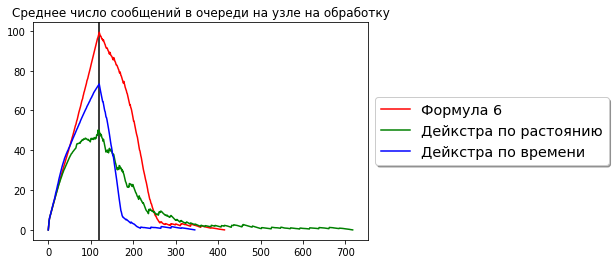

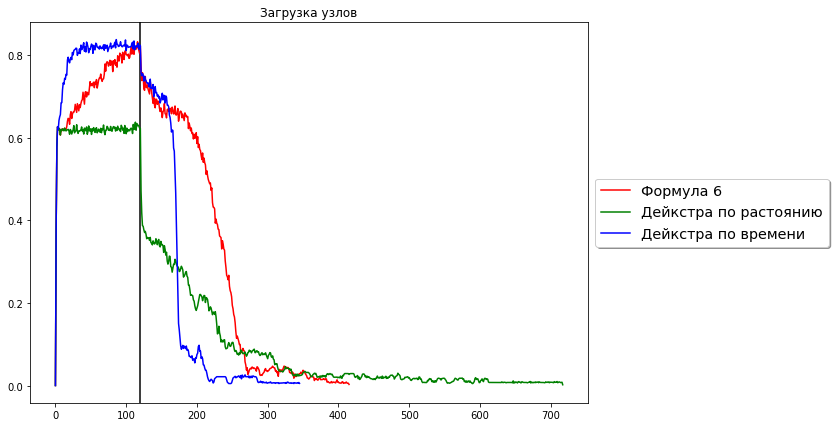

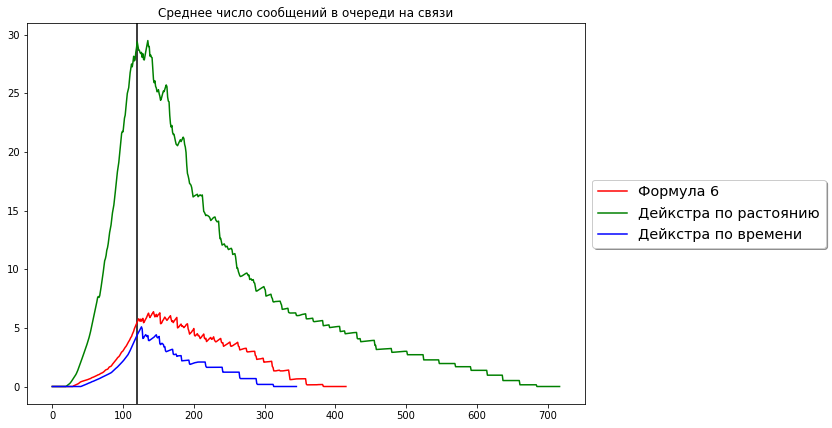

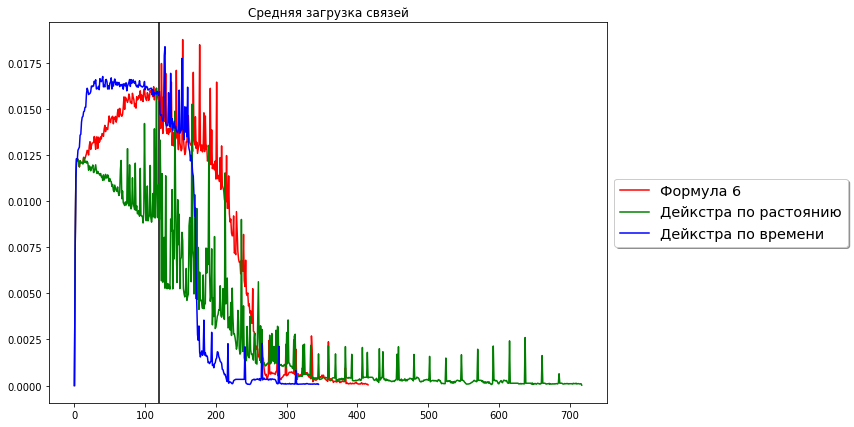

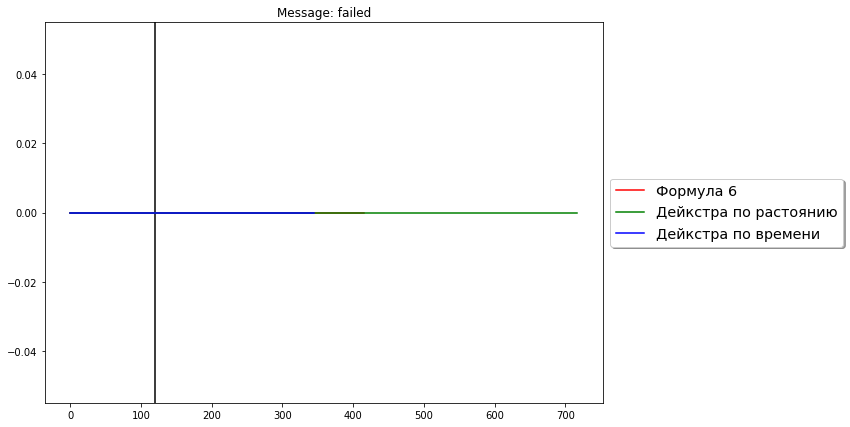

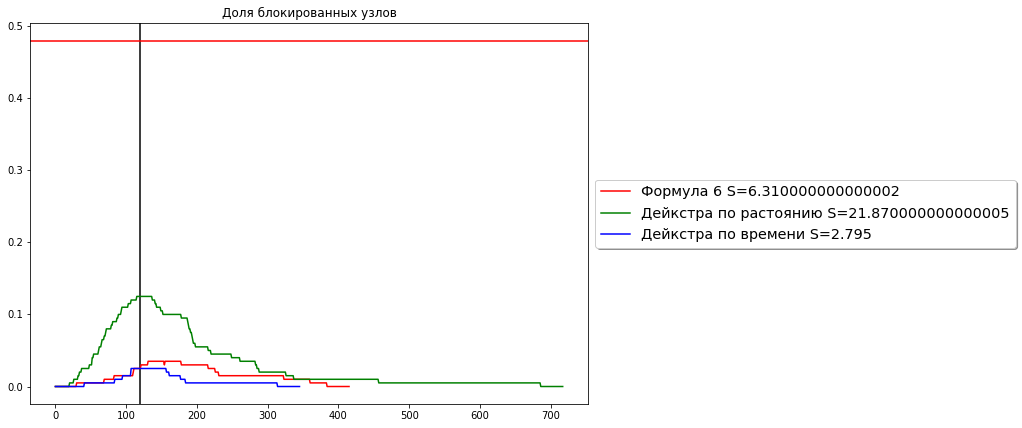

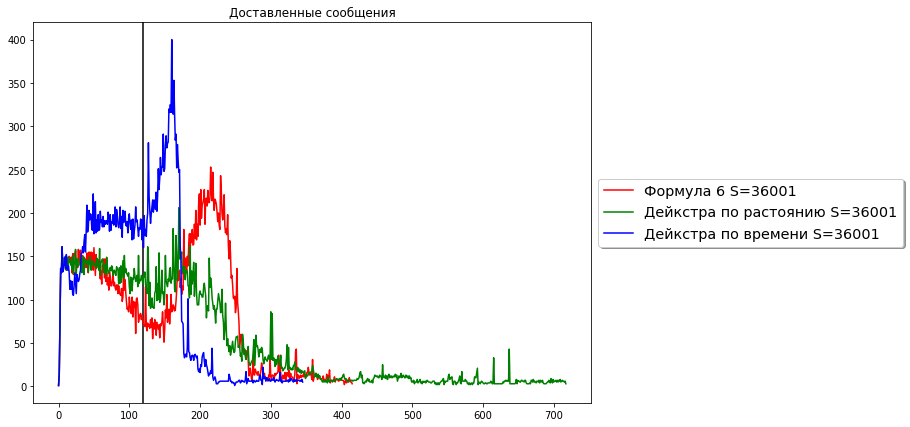

In [2]:
log_tags = [
 {"tag":  "bcc2202c-5ea4-42f5-a549-65be807afb62", "label": "Формула 6", "color": "red"},
 {"tag":  "c42c2cd6-00ec-4eeb-8805-415815473c7b", "label": "Дейкстра по растоянию", "color": "green"},
 {"tag":  "b91bc0da-871c-442d-b1b3-0aa6c5c695c8", "label": "Дейкстра по времени", "color": "blue"},
]
showStat()
showStatBlocked();  
showStatMessage(); 

<strong>Quantity 500 </strong>
 

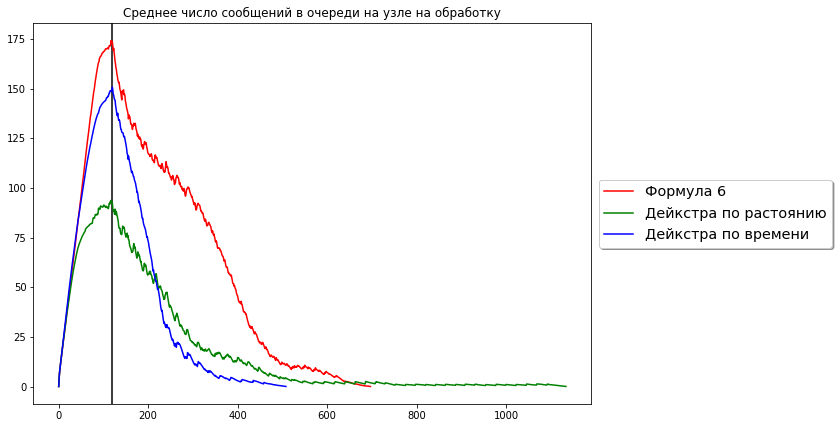

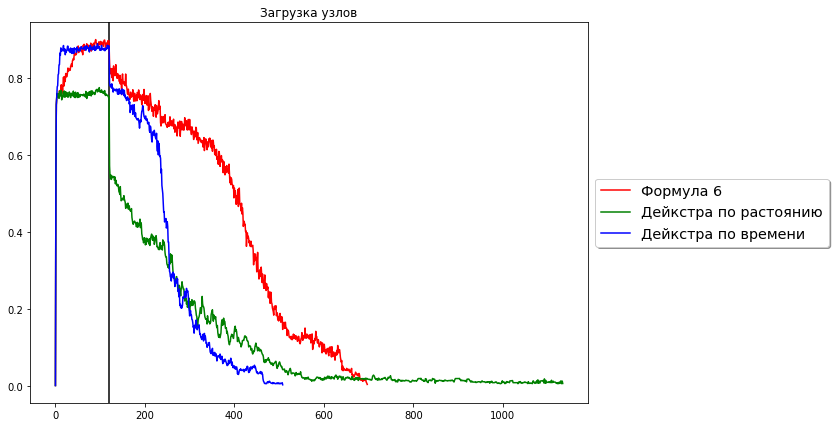

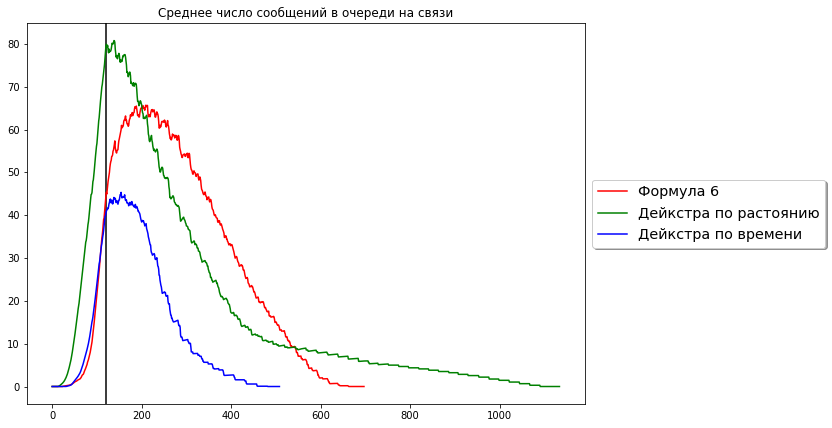

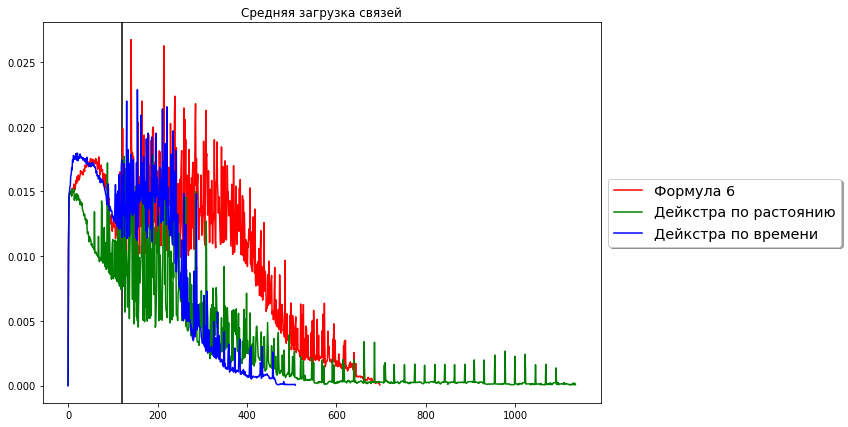

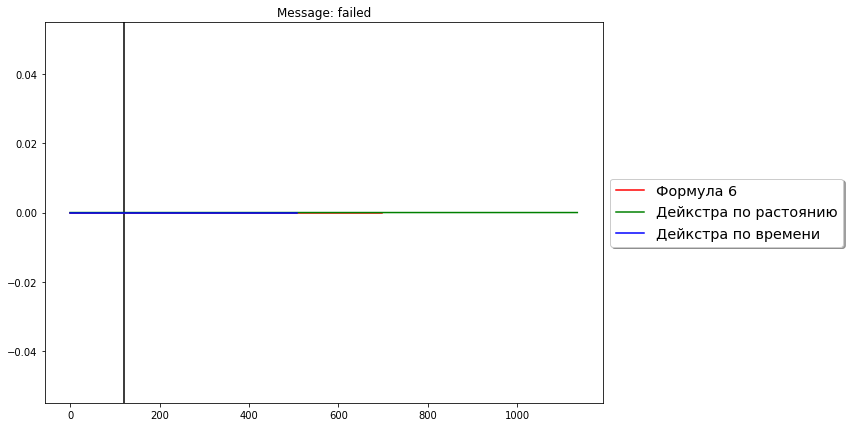

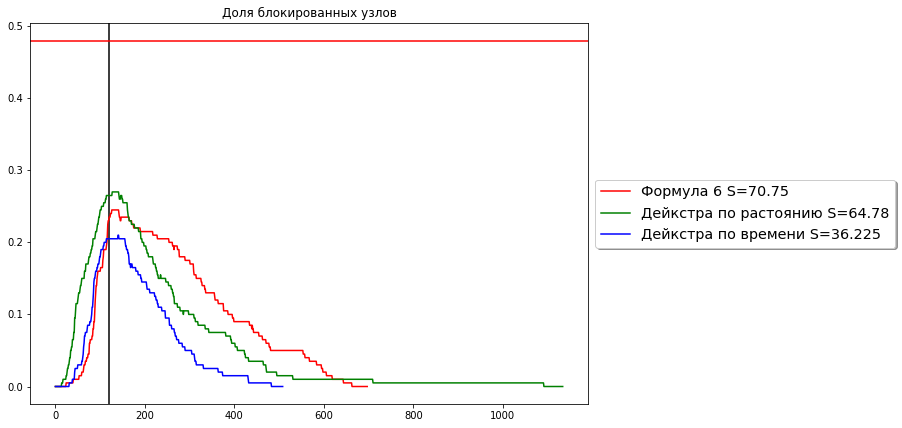

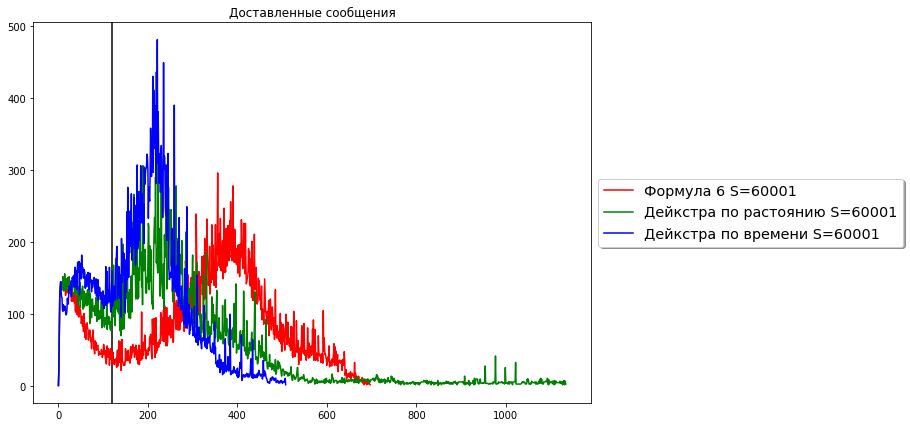

In [3]:
log_tags = [
 {"tag":  "ae313deb-cc31-4e46-a88c-3fa6915465d0", "label": "Формула 6", "color": "red"},
 {"tag":  "632d8606-ac39-499d-ac3b-a71e1b33f945", "label": "Дейкстра по растоянию", "color": "green"},
 {"tag":  "f45576ae-e2e9-424b-89d0-780a25b440e4", "label": "Дейкстра по времени", "color": "blue"},
]
showStat()
showStatBlocked();  
showStatMessage();

<strong>Quantity 1000 </strong>

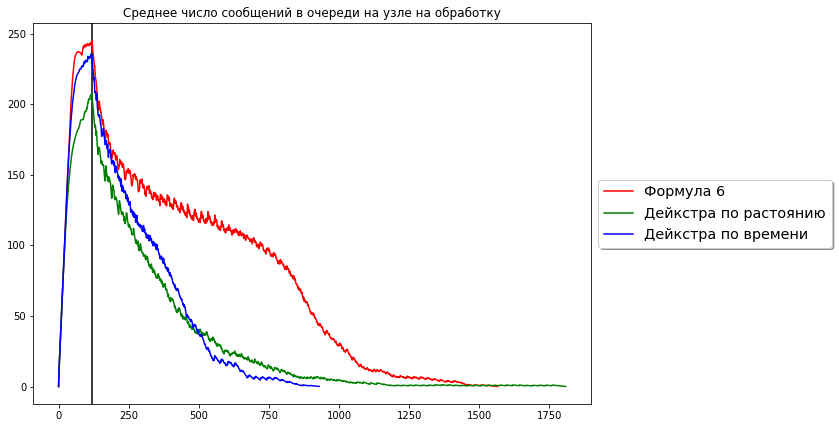

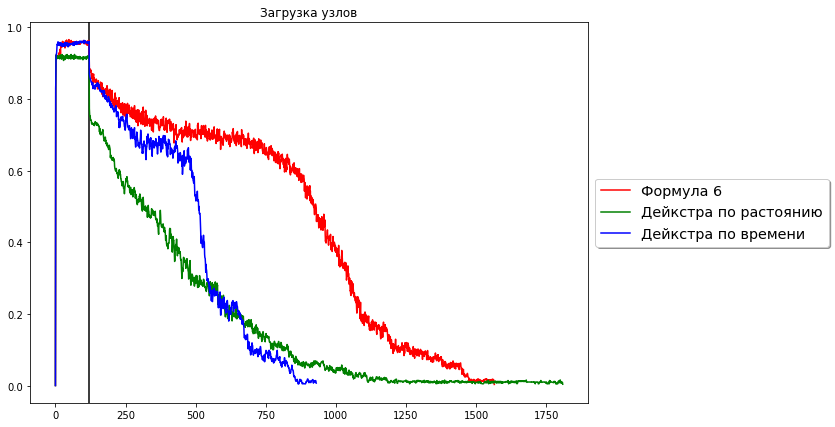

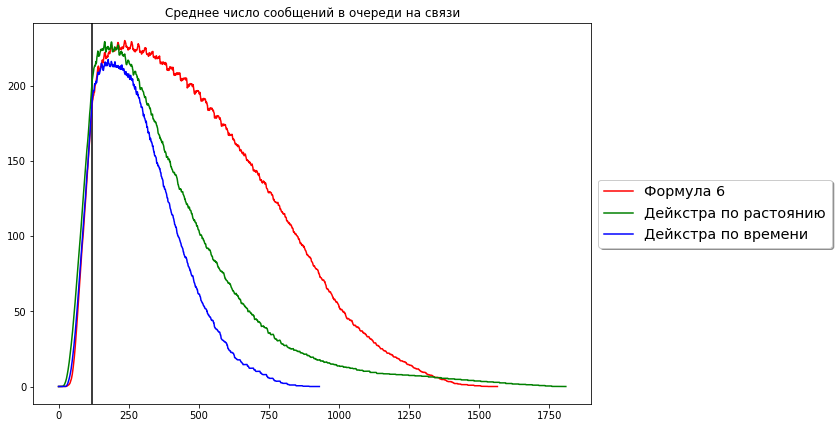

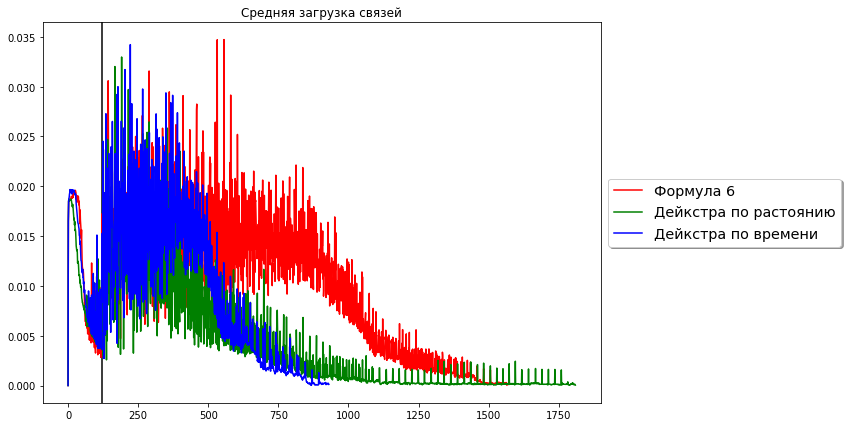

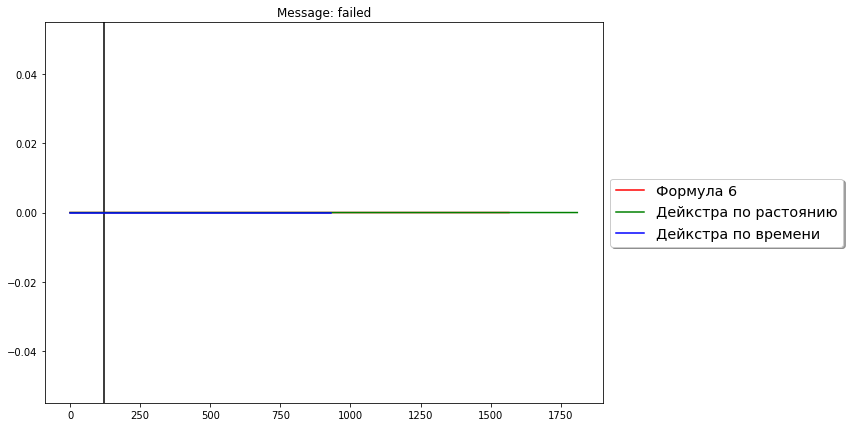

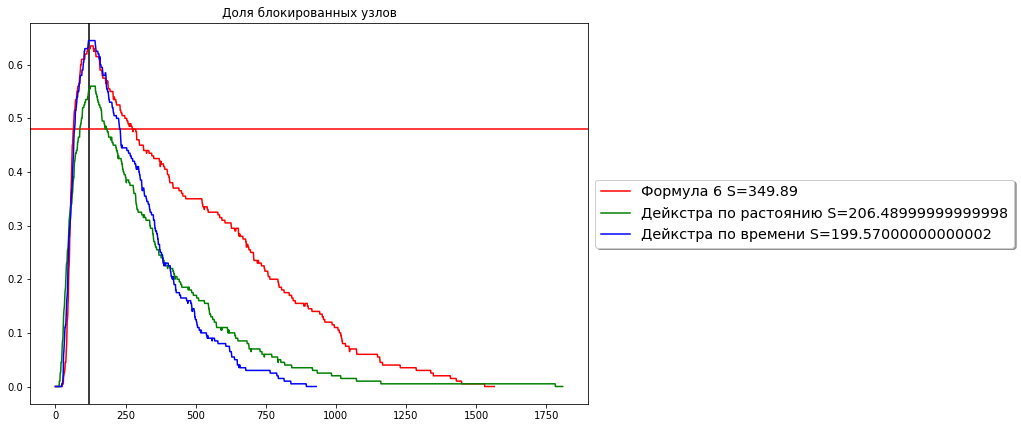

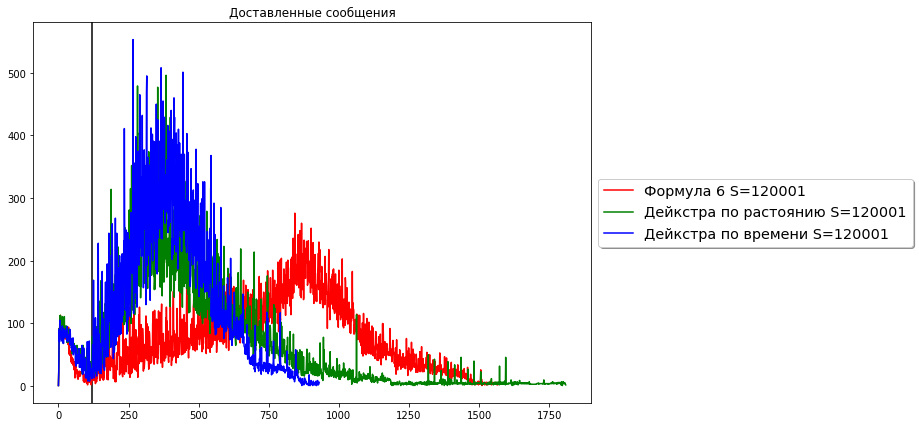

In [4]:
log_tags = [
 {"tag":  "7ab6c69f-e973-40e7-9454-ab5ceeca6dd1", "label": "Формула 6", "color": "red"},
 {"tag":  "4906e739-5eda-4046-9add-8ee722ea16e0", "label": "Дейкстра по растоянию", "color": "green"},
 {"tag":  "4b165d44-0c8d-40ce-a9bd-467ab178039e", "label": "Дейкстра по времени", "color": "blue"},
]
showStat()
showStatBlocked();  
showStatMessage();